In [1]:
import numpy as np
from numpy import exp, sqrt, abs
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
plt.rcParams['font.size'] = 14

In [2]:
pip install gzip

ERROR: Could not find a version that satisfies the requirement gzip (from versions: none)
ERROR: No matching distribution found for gzip
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import gzip

In [4]:
CASE=1
if CASE==0: dname="DATA"
if CASE==1: dname="DATA_b"
#i case==2 dname=data_C.... implement on our own if we want

fname=dname+'/x_RBM_q0.1.dat'
# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ",dtype=int)
# store in v0, because later we will shuffle v
v0 = np.copy(v)
# to start, take a small subsample
# v = v[1:11]
N = len(v)
L = len(v[1])

#SPINS = True
SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    # convert 0,1 -> -1,1
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

for i in range(min(12,N)):
    if SPINS: print(v0[i],"\n->",v[i])
    else: print(v[i])
print('...')

print(v.shape)

each of N=10000 data has L=20 digits
[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1]
[0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0]
[0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0]
[0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
[1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0]
[0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0]
[0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0]
...
(10000, 20)


In [26]:
cov_data = np.cov(v)/N

## initialize

In [5]:
# RBM, nr of hidden units
if CASE==0: M = 3
if CASE==1: M = 2
# range of each initial weight
sigma = sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)
# initial weights from a Normal distr. (see literature, e.g. page 98 of Mehta's review)
w = sigma * np.random.randn(L,M)
a = sigma * np.random.randn(L)
b = np.zeros(M)
print("w=",w);print("a=",a);print("b=",b)
w0,a0,b0=np.copy(w),np.copy(a),np.copy(b)

w= [[-8.72876393e-02  2.04222126e-01]
 [-2.21489412e-01 -2.36964198e-01]
 [ 8.38211653e-01  5.94150244e-01]
 [ 3.96160518e-02  1.20136963e-01]
 [ 3.27912325e-01  5.31481557e-01]
 [ 4.29466985e-01 -5.52710538e-01]
 [ 1.17256826e-01  9.76087795e-02]
 [ 5.76885677e-01  3.77974741e-01]
 [-8.53501017e-01 -1.58554191e-01]
 [ 7.11674783e-01 -1.87006764e-01]
 [-2.30146526e-01  2.03387092e-01]
 [ 1.38535434e+00 -4.35452880e-01]
 [-2.46070853e-01  5.29254898e-02]
 [ 1.29034856e-01  2.23337160e-01]
 [ 4.00935791e-04  5.73002421e-01]
 [-3.04256178e-01 -3.54405060e-01]
 [-1.01067017e+00 -7.93431066e-01]
 [-3.67028188e-01  2.38846755e-01]
 [-5.39796281e-01  5.10944576e-02]
 [-4.53483232e-01  1.41941667e-01]]
a= [-1.00605956 -0.0850854  -0.6575091  -0.41392318 -0.55731957  0.12209994
  0.16117297 -0.3214583   0.14126068  0.57553201  0.02979552  0.10518219
 -0.0050578   0.4284531   0.56591768 -0.39197445 -0.6605412   0.00945954
  0.32336713 -0.28164852]
b= [0. 0.]


## Plotting

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1]


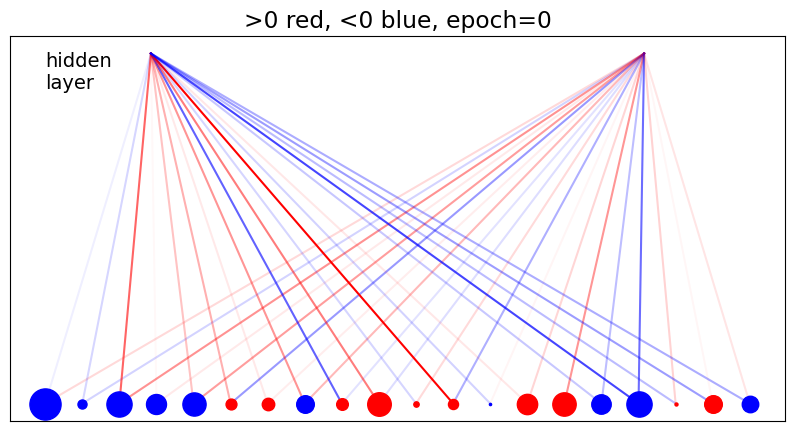

In [6]:
def create_coord(np,x0,f=1.0):
    x=[x0] * np
    print(x)
    y=list(range(np))
    for i in range(np):
        y[i] = f*(y[i]/(np-1.) - 0.5)
    return (x,y)
(x1,y1)=create_coord(L,0)
(x2,y2)=create_coord(M,1,f=0.7)

def mycolor(val):
    if val>0: return 'red'
    elif val<0: return 'blue'
    else: return 'black'

def plotgraph_vert(epoch=0):
    A=2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i],x2[j]),(y1[i],y2[j]),mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder=1, lw=A*abs(w[i][j]))
    # Scatter plot on top of lines
    
    A=300./(a.max()+b.max())
    
    for i in range(L):
        plt.scatter(x1[i], y1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))

    for j in range(M):
        plt.scatter(x2[j], y2[j], s=A*abs(b[j]), zorder=2, c=mycolor(b[j]), marker="s")
    plt.figaspect(1)
    plt.title(f'>0 red, <0 blue, epoch={epoch}')
    plt.show()
    
def plotgraph(epoch=0):
    fig, ax = plt.subplots(1,1 , figsize=(10, 5))
    ax.tick_params(left=False,bottom=False)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    
    A=1./max(w.max(),-w.min())
    for i in range(L):
        for j in range(M):
            ex, ey, col = (y1[i],y2[j]),(x1[i],x2[j]),mycolor(w[i][j])
            ax.plot(ex, ey, col, zorder=1, alpha=A*abs(w[i][j]))
    # Scatter plot on top of lines
    #A=300./(a.max()+b.max())
    A=500.
    for i in range(L):
        ax.scatter(y1[i],x1[i], s=A*abs(a[i]), zorder=2, c=mycolor(a[i]))
    for j in range(M):
        ax.scatter(y2[j], x2[j], s=min(300,A*abs(b[j])), zorder=2, c=mycolor(b[j]), marker="s")
    ax.set_title(f'>0 red, <0 blue, epoch={epoch}')
    ax.text(-0.5,0.9,"hidden\nlayer")
    plt.show()
                  
plotgraph()

In [7]:
# eq(213) page 97, activation via sigmoid
# taking into account energy gap DE=2 for "spin" variables (-1,1)
def activate(v_in,wei,bias,DE,info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + exp(-DE*act))
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out

k = 4
activate(v[k],w,b,GAP,info=True)

input= [0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0]
act= [-0.26465979  1.34505401]
prob= [0.43421858 0.79331984]
output= [0 0]


array([0, 0])

## Point 4:

If we simply use the activate function for the backward step of the contrastive divergence, we would generate vectors with 0s and 1s (activating a 1 for each component of the new vector, if a random generated number is under the probability calculated above). If we do so, however, for each 4 blocks of the vector there are $2^4$ possible states, while fot the way in which our data is structured (one-hot encoding) the ''real'' possible states are only 4: 0001,0010,0100,1000.    

Here is what I did:
- I defined a vector that contains all possible states, $s$
- for each entry of our data (a row with 20 elements) I divide it in blocks of 4;
- I compared each block of 4 with each state of s, to recognize to which state it corresponds;
- I compute the energy of the state as  $$E_{state}= \sum_{k \in block}[a_{k}+ \sum_{\nu}W_{k \nu}h_{\nu}]v_{k}$$
  where $v_{k}$ is (each time) the sub-vector of our real vector v constituded by 4 elements;

- I computed the Boltzmann's weights for each of the 4 states as $exp^{-E_{state}}$
- I calculated the normalized probability $p$.

Then, in order to have 4 intervals between 0 and 1, I calculated the cumulative probability for each state: $${C_{prob}}_i=\sum_{j\leq i}p_j$$.    
    
At this point, I have 4 levels that divide the gap 0-1 into 4 intervals. I generate a random number between 0 and 1 and, depending on which interval it belongs, I then generate the corresponding state of s.    
In this way, I generate 4 blocks at a time of the new "fantasy" vector (so I do it $5$ times), preserving the one-hot encoding structure.

In [32]:
s = np.array([[0,0,0,1],[0,0,1,0],[0,1,0,0],[1,0,0,0]])
vtest = np.array([0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0])
print(vtest)
htest = np.array([0, 0])  


def activate_back(v,h,w,a,k,steps):
    
    e = np.zeros(4)
    
    for i in range(0,20,4):
        for j in range(len(s)):
            if np.array_equiv(v[i:i+4],s[j])==True:
                local_f = a[i:i+4]+np.dot(w[i:i+4,:],h)
                e[j]+= np.dot(local_f,v[i:i+4])
    bol = exp(-e)
    p = bol/bol.sum()
    #print(p)
    cprob = np.zeros(4)
    cprob[0] = p[0]
    for i in range(1,4):
        cprob[i]+=cprob[i-1]+p[i]
        
    vf = np.zeros(20)
    for i in range(0,20,4):
        x = np.random.random()
        if x<=cprob[0]:
            vf[i:i+4]=s[0]
        if cprob[0]<x<=cprob[1]:
            vf[i:i+4]=s[1]
        if cprob[1]<x<=cprob[2]:
            vf[i:i+4]=s[2]
        if cprob[2]<x<=cprob[3]:
            vf[i:i+4]=s[3]
            
    #for i in range(0,3):
        #if k == 500*i and steps==1:
            #print('----initiating backward CD: k = ',k,'----')
            #print('WEIGHTS[0] : ', w.T[0])
            #print('EVALUATED ENERGIES = ',e, '\n') 
            #print('PROBABILITY : ', p, '\n')                       #it starts to behave strangely after 4,5 epochs
            #print('CUMULATIVE PROBABILITY : ', cprob, '\n\n')
            
    return(vf,cprob)

vf, cprob = activate_back(vtest,htest,w,a,1,1)
print(vf)
print(cprob)

[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0]
[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
[0.21038277 0.49560682 0.63267459 1.        ]


## Energies

In [33]:
def E(v,h):
    ene = -(np.dot((np.dot(v,w)).T,h))-np.dot(a.T,v)-np.dot(b.T,h)
    return ene

# Training with ADAM and more steps of CD

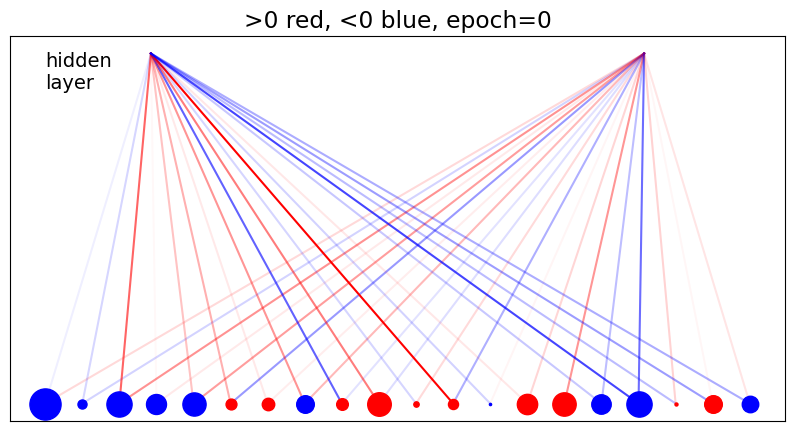

E_rbm =  [14945.46325804     0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.

E_rbm =  [14945.46325804 12672.03327388 11513.05175052 10549.9695531
 10003.647171       0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.        

E_rbm =  [14945.46325804 12672.03327388 11513.05175052 10549.9695531
 10003.647171    9496.14239087  9105.75684363  8947.64220901
  8879.07653488     0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.

E_rbm =  [14945.46325804 12672.03327388 11513.05175052 10549.9695531
 10003.647171    9496.14239087  9105.75684363  8947.64220901
  8879.07653488  8853.95068357  8969.37254022  8681.83432855
  8766.23178726     0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.       

E_rbm =  [14945.46325804 12672.03327388 11513.05175052 10549.9695531
 10003.647171    9496.14239087  9105.75684363  8947.64220901
  8879.07653488  8853.95068357  8969.37254022  8681.83432855
  8766.23178726  8735.32381484  9017.75126681  9025.75764006
  8974.73137168     0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0

E_rbm =  [14945.46325804 12672.03327388 11513.05175052 10549.9695531
 10003.647171    9496.14239087  9105.75684363  8947.64220901
  8879.07653488  8853.95068357  8969.37254022  8681.83432855
  8766.23178726  8735.32381484  9017.75126681  9025.75764006
  8974.73137168  9261.3843454   9121.70201952  9141.73221596
  9272.302402       0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0.
     0.             0.             0.             0

KeyboardInterrupt: 

In [34]:
# random seed for reproducibility
np.random.seed(12345)

plotgraph(0)
N = 10000
Nv = 20
epochs = 100

# learning rate
l_rate = 1.0

# initialize Adam 
beta1=0.9
beta2=0.999
epsilon=1e-8
m_dw, v_dw = 0, 0
m_db, v_db = 0, 0
m_da, v_da = 0, 0

beta=0.9

t=1

#covariance
cov_sum = np.zeros(epochs)

#energies
E_rbm = np.zeros(epochs)
E_d = np.zeros(epochs)

V = []


l_list=np.zeros(epochs)

# minibatch
mini, m = 500, 0
steps=10
# train model
print('===================================================')
for epoch in range(epochs):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h 
        h = activate(v[k],w,b,GAP)
        hf = h
        vf = v[k]
        for i in range(steps):
            vf,_ = activate_back(vf,hf,w,a,k,i)
            # one more positive CD phase: generating fantasy h from fantasy vf 
            hf = activate(vf,w,b,GAP)
        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
        
        V.append(vf)
        
        
        # update energies of the state for each row
        E_rbm[epoch] += E(vf,h)
        E_d[epoch] += E(v[k],h)
    
        m += 1
        # minibatch
        
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a Adam optimizer
            dw = l_rate_m*(vh_data - vh_model)
            da = l_rate_m*(v_data - v_model)       
            db = l_rate_m*(h_data - h_model)
            
            if epoch<=200: #ADAM
                ##********update***********##
                m_dw = beta1*m_dw + (1-beta1)*(vh_data - vh_model)
                m_db = beta1*m_db + (1-beta1)*(h_data - h_model)
                m_da = beta1*m_da + (1-beta1)*(v_data - v_model)

                ## rms beta 2
                v_dw = beta2*v_dw + (1-beta2)*((vh_data - vh_model)**2)
                v_db = beta2*v_db + (1-beta2)*((h_data - h_model)**2)
                v_da = beta2*v_da + (1-beta2)*((v_data - v_model)**2)

                ## bias correction
                m_dw_corr = m_dw/(1-beta1**t)
                m_db_corr = m_db/(1-beta1**t)
                m_da_corr = m_da/(1-beta1**t)

                v_dw_corr = v_dw/(1-beta2**t)
                v_db_corr = v_db/(1-beta2**t)
                v_da_corr = v_da/(1-beta2**t)
            
                ## update weights and biases
                w = w - l_rate_m*(m_dw_corr/(np.sqrt(v_dw_corr)+epsilon))
                b = b - l_rate_m*(m_db_corr/(np.sqrt(v_db_corr)+epsilon))
                a = a - l_rate_m*(m_da_corr/(np.sqrt(v_da_corr)+epsilon))
                m=0
                t=t+1 #update the time
                
            else: #RMSprop
                v_dw = beta*v_dw + (1-beta)*((vh_data - vh_model)**2)
                v_db = beta*v_db + (1-beta)*((h_data - h_model)**2)
                v_da = beta*v_da + (1-beta)*((v_data - v_model)**2)
                w = w - l_rate_m*((vh_data - vh_model)/(np.sqrt(v_dw+epsilon)))
                b = b - l_rate_m*((h_data - h_model)/(np.sqrt(v_db+epsilon)))
                a = a - l_rate_m*((v_data - v_model)/(np.sqrt(v_da+epsilon)))

                m=0
            
            #if epoch%10==9 and k<=mini:
                #print('----------- epoch =',epoch,'  k=',k,'  m=',m)
                #print('dw =',dw)
                #print('da =',da)
                #print('db =',db)
                #print('vh_data \n', vh_data, '\n')
                #print('vh_model \n',vh_model)

    Vf = np.array(V)
    cov_vf = np.cov(Vf)
    #covariance:
    for j in range(0,N):
        for i in range(0, j):
            cov_sum[epoch]+=(cov_vf[i,j]-cov_data[i,j])**2
    cov_sum[epoch] = (cov_sum[epoch]*2)/(Nv*(Nv-1))
        
    print('E_rbm = ', E_rbm)
    print('E_data = ', E_d)
    # randomize the order of input data
    np.random.shuffle(v)
    V = []
    l_list[epoch] =l_rate  #we will use this list for 7th point
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        #plotgraph(epoch+1)
        print('l_rate = ',l_rate)


In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(epochs), E_d, label='Data energy', color='navy')
ax.plot(np.arange(epochs), E_rbm, label='RBM energy', color='indianred')
ax.legend(loc='best')

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(epochs), E_rbm-E_d, label='difference', color='navy')

## Covariance matrix


In [ ]:
fig, ax = plt.subplots()
ax.plot(np.arange(epochs), cov_sum, label='difference', color='indianred')

# 1. Reading weight

We have a data when the we had [0,1], now we want to use [-1,1] 

In [8]:
CASE=1
if CASE==0: dname="DATA"
if CASE==1: dname="DATA_b"

fname=dname+'/x_RBM_q0.1.dat'
# loading data: each row is a list of visible units
# NOTE: data "x" here is named "v" for "visible"
v = np.loadtxt(fname, delimiter=" ",dtype=int)
# store in v0, because later we will shuffle v
v0 = np.copy(v)

N = len(v)
L = len(v[1])

SPINS = True
#SPINS = False

if SPINS:
    # sigmoid takes into account energy difference =2
    GAP=2
    # convert 0,1 -> -1,1
    v = 2*v - 1
    vmin=-1
else:
    GAP=1
    vmin=0

print(f'each of N={N} data has L={L} digits')

for i in range(min(12,N)):
    if SPINS: print(v0[i],v[i])
    else: print(v[i])


each of N=10000 data has L=20 digits
[0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0] [-1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1] [-1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1]
[0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1] [-1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1]
[0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0] [-1  1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1]
[0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0] [-1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1]
[0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0] [-1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1]
[0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0] [-1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1]
[0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1] [-1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1]
[1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0] [ 1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1 -1 -1]
[0 0 0 1 1 0 0 0 0 0 1 0 0 

In [9]:
if CASE==1: M = 2
# range of each initial weight
sigma = sqrt(4. / float(L + M))
# random seed for reproducibility
np.random.seed(12345)

w1 = sigma * np.random.randn(L,M)
a1 = sigma * np.random.randn(L)
b1 = np.zeros(M)


In [10]:
# write activate and activate back function for new gap and minimum energy
def activate1(v_in,wei,bias,DE,info=False):
    act = np.dot(v_in, wei) + bias
    n = np.shape(act)
    prob = 1. / (1. + exp(-DE*act))
    v_out = np.full(n, vmin, dtype=int) # a list on -1's or 0's
    v_out[np.random.random_sample(n) < prob] = 1 # activate the 1's with probability prob
    if info:
        print('input=', v_in)
        print('act=',act)
        print('prob=',prob)
        print('output=',v_out)
    return v_out


def activate_back1(v,h,w,a,k,steps):
    
    e = np.zeros(4)
    
    for i in range(0,20,4):
        for j in range(len(s)):
            if np.array_equiv(v[i:i+4],s[j])==True:
                local_f = a[i:i+4]+np.dot(w[i:i+4,:],h)
                e[j]+= np.dot(local_f,v[i:i+4])
    bol = exp(-e)
    p = bol/bol.sum()
    cprob = np.zeros(4)
    cprob[0] = p[0]
    for i in range(1,4):
        cprob[i]+=cprob[i-1]+p[i]
        
    vf = np.zeros(20)
    for i in range(0,20,4):
        x = np.random.random()
        if x<=cprob[0]:
            vf[i:i+4]=s[0]
        if cprob[0]<x<=cprob[1]:
            vf[i:i+4]=s[1]
        if cprob[1]<x<=cprob[2]:
            vf[i:i+4]=s[2]
        if cprob[2]<x<=cprob[3]:
            vf[i:i+4]=s[3]            
    return(vf,cprob)


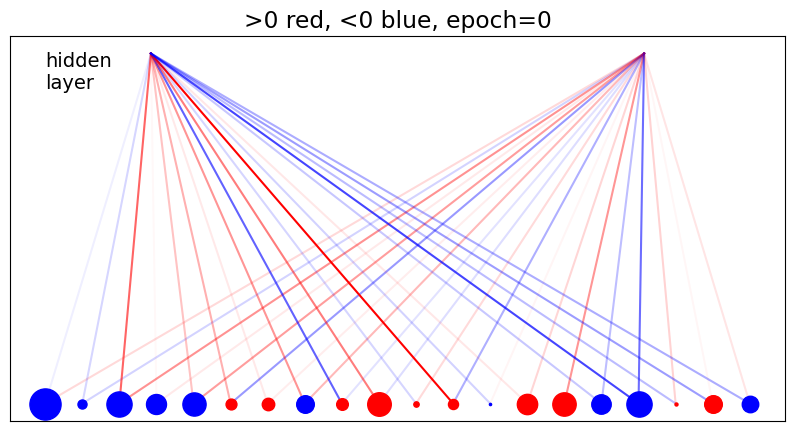

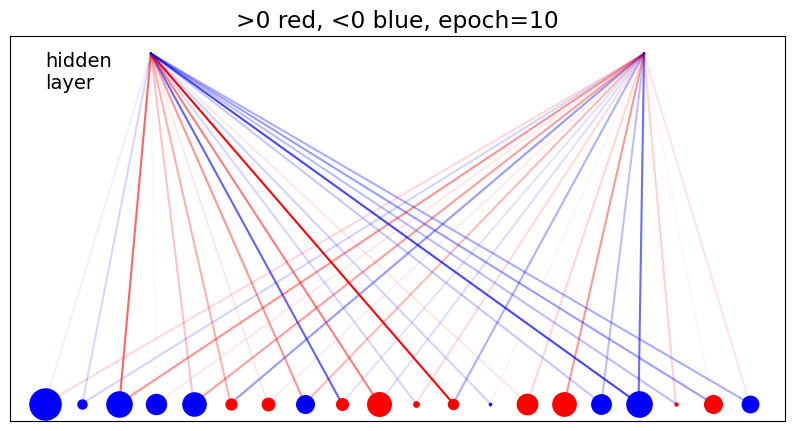

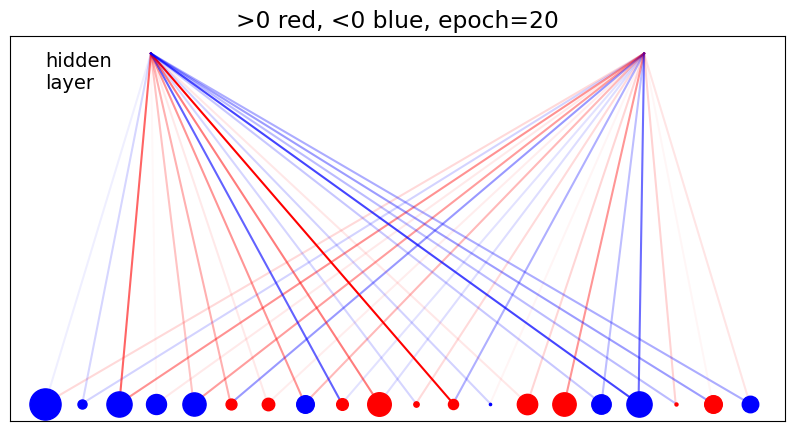

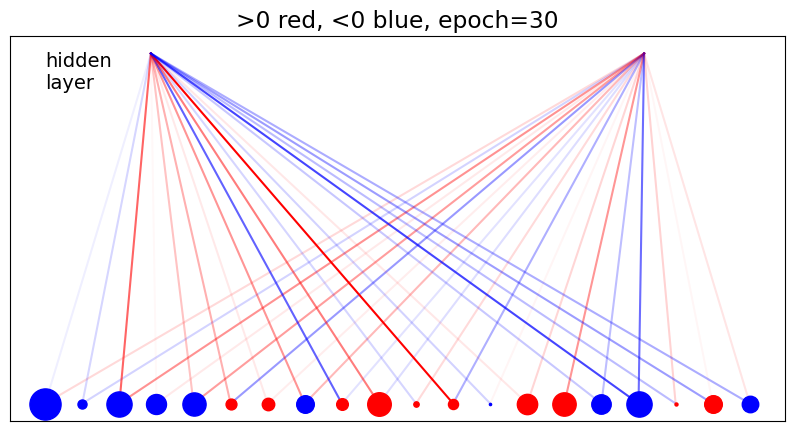

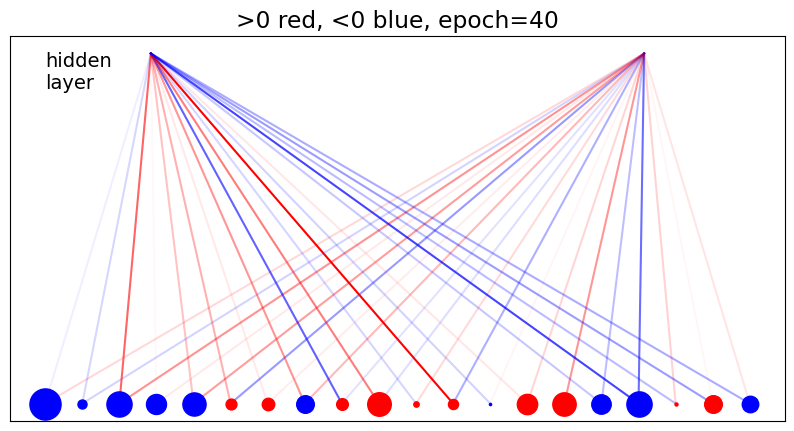

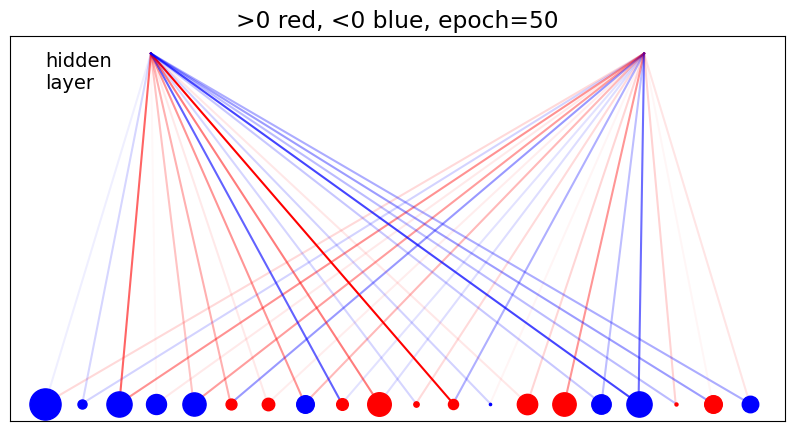

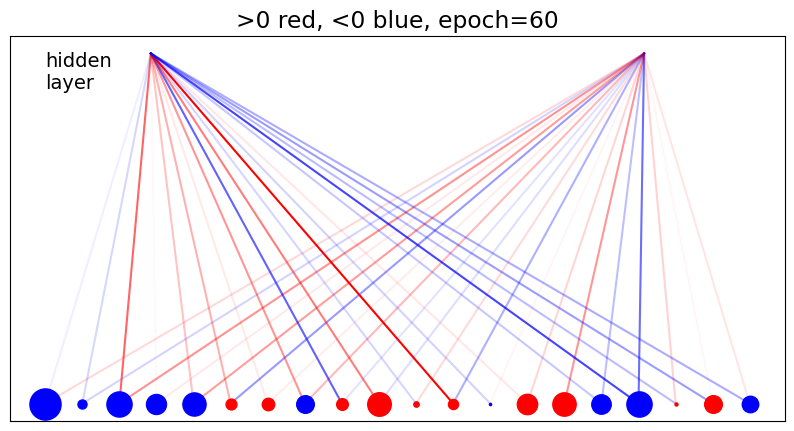

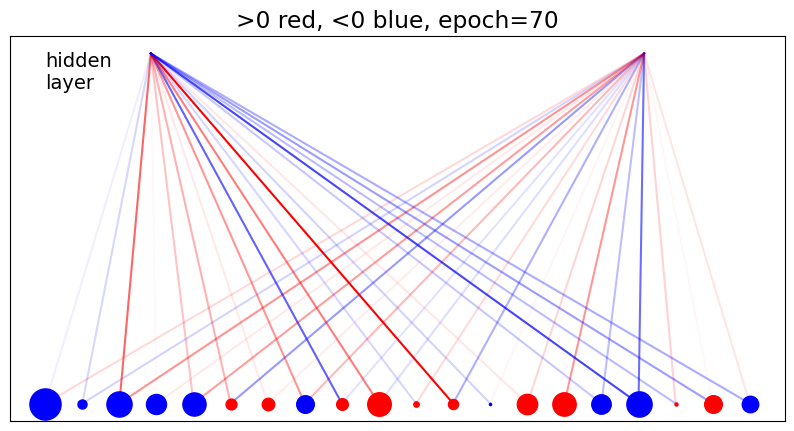

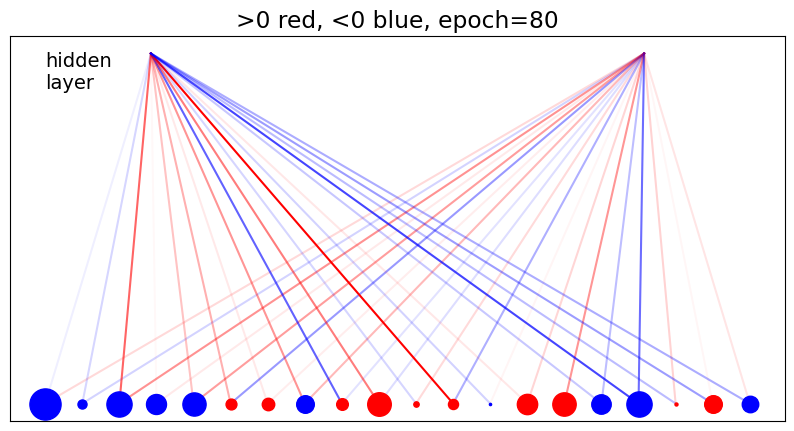

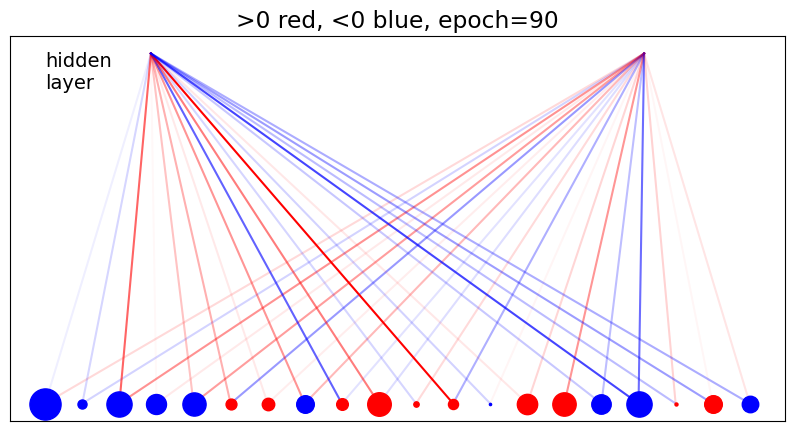

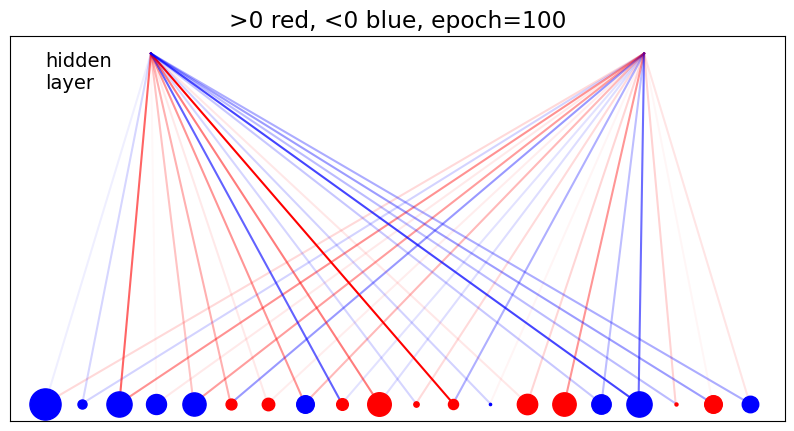

In [67]:
np.random.seed(12345)

plotgraph(0)
N = 10000
Nv = 20
epochs = 100

# learning rate
l_rate = 1.0

# initialize Adam 
beta1=0.9
beta2=0.999
epsilon=1e-8
m_dw, v_dw = 0, 0
m_db, v_db = 0, 0
m_da, v_da = 0, 0

beta=0.9

t=1

# minibatch
mini, m = 500, 0
steps=10
# train model
print('===================================================')
for epoch in range(epochs):
    # aggregate normalization of batch statistics and learning rate
    l_rate_m = l_rate / mini
    for k in range(N):
        if m==0:
            # initialize averages in miniblock
            v_data, v_model = np.zeros(L),np.zeros(L)
            h_data, h_model = np.zeros(M),np.zeros(M)
            vh_data,vh_model= np.zeros((L,M)),np.zeros((L,M))

        # positive CD phase: generating h 
        h = activate1(v[k],w,b,GAP)
        hf = h
        vf = v[k]
        for i in range(steps):
            vf,_ = activate_back1(vf,hf,w,a,k,i)
            # one more positive CD phase: generating fantasy h from fantasy vf 
            hf = activate1(vf,w,b,GAP)
        v_data  += v[k]
        v_model += vf
        h_data  += h
        h_model += hf
        vh_data += np.outer(v[k].T,h)
        vh_model+= np.outer(vf.T,hf)
        
        V.append(vf)
    
        m += 1
        # minibatch
        
        if m==mini:
            # gradient of the likelihood: follow it along its positive direction
            # with a Adam optimizer
            dw = l_rate_m*(vh_data - vh_model)
            da = l_rate_m*(v_data - v_model)       
            db = l_rate_m*(h_data - h_model)
            
            if epoch<=200: #ADAM
                ##********update***********##
                m_dw = beta1*m_dw + (1-beta1)*(vh_data - vh_model)
                m_db = beta1*m_db + (1-beta1)*(h_data - h_model)
                m_da = beta1*m_da + (1-beta1)*(v_data - v_model)

                ## rms beta 2
                v_dw = beta2*v_dw + (1-beta2)*((vh_data - vh_model)**2)
                v_db = beta2*v_db + (1-beta2)*((h_data - h_model)**2)
                v_da = beta2*v_da + (1-beta2)*((v_data - v_model)**2)

                ## bias correction
                m_dw_corr = m_dw/(1-beta1**t)
                m_db_corr = m_db/(1-beta1**t)
                m_da_corr = m_da/(1-beta1**t)

                v_dw_corr = v_dw/(1-beta2**t)
                v_db_corr = v_db/(1-beta2**t)
                v_da_corr = v_da/(1-beta2**t)
            
                ## update weights and biases
                w1 = w1 - l_rate_m*(m_dw_corr/(np.sqrt(v_dw_corr)+epsilon))
                b1 = b1 - l_rate_m*(m_db_corr/(np.sqrt(v_db_corr)+epsilon))
                a1 = a1 - l_rate_m*(m_da_corr/(np.sqrt(v_da_corr)+epsilon))
                m=0
                t=t+1 #update the time
                
            else: #RMSprop
                v_dw = beta*v_dw + (1-beta)*((vh_data - vh_model)**2)
                v_db = beta*v_db + (1-beta)*((h_data - h_model)**2)
                v_da = beta*v_da + (1-beta)*((v_data - v_model)**2)
                w1 = w1 - l_rate_m*((vh_data - vh_model)/(np.sqrt(v_dw+epsilon)))
                b1 = b1 - l_rate_m*((h_data - h_model)/(np.sqrt(v_db+epsilon)))
                a1 = a1 - l_rate_m*((v_data - v_model)/(np.sqrt(v_da+epsilon)))

                m=0
            
    # decrease the learning rate (here as a power law)
    l_rate = l_rate / (0.01 * l_rate + 1)
    if epoch%10==9:
        plotgraph(epoch+1)


In [68]:
np.savetxt('weight -1',w1)
np.savetxt('bias -1',b1)
np.savetxt('a -1',a1)


# Optional 5. plot the weights 


Plot the weights wiμ of each hidden unit μ
in an A×G table, with a color map preserving the
rule that red means positive and blue
means negative weight

In [ ]:
print('w0=',w0);print('a0=',a0);print('b0=',b0)
print('w=',w);print('a=',a);print('b=',b)


In [ ]:
w1=[w[:,i].reshape(4,5) for i in range(M)]
import seaborn as sns

fig, axs = plt.subplots(ncols=6, figsize=(5*6,4))
for i in range(M):
    sns.heatmap(w1[i], cmap='coolwarm', annot=False, ax=axs[i])
    axs[i].set_title(f'Hidden Unit {i+1}')
    plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(35,15))
for i in range(M):
    sns.heatmap(w1[i], cmap='coolwarm', annot=False, ax=axs.flat[i])
    axs.flat[i].set_title(f'Hidden Unit {i+1}')
plt.show()



## Optional 7. 

We want to measure entropy because when $\Delta S$ is large, it means that the generated samples are less ordered than the samples coming from the source. However if small, it means that the generated samples lack diversity.

In [11]:
w_1=np.loadtxt('weight -1')

Vf= np.loadtxt('Vf_ADrms.txt')
E_d_AR = np.loadtxt('E_d_ADrms.txt')
E_rbm_AR = np.loadtxt('E_rbm_ADrms.txt')


200000 10000
200000


In [63]:
def S(v0, v1):
    s1 = np.random.randint(v0.shape[0], size=int(v0.shape[0]/2))
    s2 = np.random.randint(v1.shape[0], size=int(v1.shape[0]/2))
    v1_new = np.concatenate((v0[s1, :], v1[s2, :]))
    delta_s= len(gzip.compress(v0))/len(gzip.compress(v1_new)) -1 
    return delta_s


epochs=list(range(0,100,1))
entropy=[]
for epoch in epochs:
#    if epoch%5==4:
        entropy.append(S(v0,Vf))
print(entropy)

[-0.003810830379939789, -0.006687692366151188, -0.005667554203119041, -0.0009936179156952996, -0.007781067334699743, -0.0024803480119056642, -0.00789403772439179, -0.002213824955150989, 0.0, -0.0025945285970467857, -0.005932235616230019, 0.003570331695331719, -0.0009936179156952996, -0.0037348984336292856, -0.00034416826003824674, 0.0006507426121573623, -0.008082264551870666, 0.004534450293970815, 0.003416244434208515, -0.006876377174986681, -0.00403855678744236, -0.00475900403563545, -0.005478409739395063, -0.001222634012149948, -0.00437995124923829, 0.00019130700948877255, 0.003955756970581481, -0.0017565967846641106, -0.003507033126215031, -0.0013371026894865023, -0.002251908396946556, -0.002784771496147087, -0.0025945285970467857, -0.010485275191157495, -0.00026770689918920176, -0.0020233641291899085, -0.007555049354593724, -0.0016803513461906006, -0.00559190505173468, 3.825554705438883e-05, -0.0038867507525816025, -0.00453160700685451, -0.00026770689918920176, -0.00373489843362928

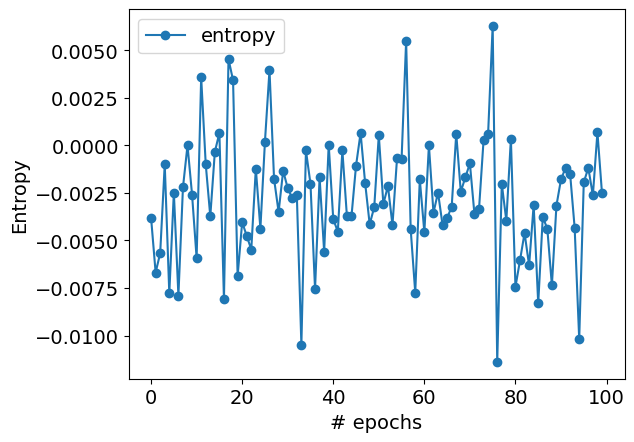

In [65]:
plt.plot(epochs, entropy, label="entropy" ,marker="o")
plt.xlabel("# epochs")
plt.ylabel("Entropy")
plt.legend()
plt.show()


In [61]:
def energy(v,h,w,a,b):
    eng = - np.dot(a,v) - np.dot(b,h) - np.dot(v.T@w,h)
    return eng

def gen(I , A, G):
    S=[np.array([0,0,0,1]), np.array([0,0,1,0]), np.array([0,1,0,0]), np.array([1,0,0,0])]
    k=[]
    for i in k:
        k.append(S[int(i)])
    k=np.array(k)
    k=k.reshape(A,G)
    if SPINS:
        k=k*GAP + np.full(A*G,vmin)
    return k

def log_likelihood(w, a, b, v, h):
    eng, Z, L = 0, 0, 0 
    for i in range(N):
        eng += energy(v[i], h[i], w, a, b)
    eng /= v.shape[0] # N

    num_config = (A**G)*(2**M)
    for i in range(int(A**G)): # A**G = 4**5 1024, 2*M
        vgen = np.base_repr(i, base=A).zfill(G)
        vgen = gen(vgen, A, G)
        for j in range(int(2**M)):
            hgen = np.base_repr(j, base=2).zfill(M) 
            hgen = np.array([int(x) for x in str(hgen)])
            if SPINS:
                hgen = hgen*GAP + np.full(M, vmin)
            Z += np.exp(-energy(vgen, hgen, w, a, b))
           

    L = eng + np.log(Z)   
    return L

In [62]:
likeli=[]

for epoch in range(epochs):
        likeli.append(log_likelihood(w,a,b,v0,h))
print(likeli)

# there is a h in this part which is mentioned in the 4th point 

NameError: name 'h' is not defined

In [ ]:
plt.plot(epochs, entropy, label="log_likelihood" ,marker="o")
plt.xlabel("epochs")
plt.ylabel("Log_likelihood")
plt.legend()
plt.show()
